#### Impact Analysis of Mobile Phone Usage on Academic Performance and Health Outcomes in Students

#### Team Name: Project Group3

#### Team Members:

1.Maneesh Varma Mynam<br>
2.Tanishq Mahajan<br>
3.Nishit Saraf<br>


# Project Description:
Project investigates the relationship between mobile phone usage, academic performance, and health among university students using a dataset of students information form Kaggle. The dataset includes detailed information on students' ages, genders, mobile phone ownership, usage patterns for educational purposes, perceptions of usefulness, reported health symptoms, and overall academic performance. The aim is to understand how mobile phone usage influences students' academic success and health outcomes, offering insights into potential areas for targeted interventions.

Our project is descriptive and diagnostic in nature. We seek to elucidate current patterns and relationships within the data and diagnose potential factors influencing students' academic and health metrics. To achieve this, we will employ both unsupervised and supervised learning techniques:

<b>Unsupervised Learning:</b> We will use clustering methods, such as K-means or hierarchical clustering, to segment students into distinct groups based on their mobile phone usage patterns and health symptoms. This will help identify common profiles within the student population, such as those with heavy mobile phone use and high levels of reported health issues.

<b>Supervised Learning:</b> We will apply logistic regression to predict the perceived impact of mobile phone usage on academic performance. This method will allow us to determine how factors such as mobile phone use frequency and reported health symptoms influence students' perceptions of their academic performance.

Additionally, we will explore association rules to uncover significant relationships between mobile phone activities and health symptoms. This approach will help identify patterns and dependencies that could inform targeted recommendations for students' mobile phone usage to improve academic and health outcomes.

Overall, the project aims to provide a comprehensive analysis of how mobile phone usage affects students' academic performance and health, facilitating the development of evidence-based strategies for enhancing student well-being and academic achievement.


# Research Question: 
How does mobile phone usage affect students' academic performance and health outcomes, and which specific usage patterns and health symptoms are most closely linked to changes in perceived academic performance?

# Relevant Domain Information

# Data Source and Description

Our initial review of the dataset reveals comprehensive details on students’ mobile phone usage, academic performance, and health outcomes. The dataset includes attributes such as demographic information, mobile phone ownership, usage patterns for educational purposes, health symptoms, and academic performance metrics.

Key observations from the dataset include:

<b>Demographic Distribution:</b>
The dataset encompasses a diverse age range and gender distribution, providing a representative sample of the student population.<br>
<b>Mobile Phone Ownership and Usage Patterns:</b>
Almost all students own mobile phones, with varied usage frequencies for educational purposes. Some use their phones frequently for learning activities, while others use them less often.
The types of activities include online research, educational apps, and email, highlighting the multifaceted ways students integrate mobile phones into their academic routines.<br>
<b>Perceptions of Academic Impact:</b>
Students have varied opinions on whether mobile phone use benefits or detracts from their academic performance. This variation suggests that the impact of mobile phones on academic success may differ based on usage patterns and individual circumstances.<br>
<b>Health Symptoms and Precautions:</b>
A range of health symptoms related to mobile phone use, such as sleep disturbances, headaches, and anxiety, are reported by students. The frequency of these symptoms varies, with some students experiencing them regularly.
Precautions taken to mitigate health risks include using blue light filters, limiting screen time, and taking breaks, though not all students adopt these measures.


# Data Preparation
<b>1.Data Import:</b><br>
Loaded the dataset from a CSV file into a DataFrame to make it ready for analysis.<br>
<b>2.Handling Missing Values:</b><br>
Checked for and addressed missing data by either filling in gaps with default values or removing incomplete rows to ensure a complete dataset.<br>
<b>3.Data Transformation:</b><br>
<b>Categorical Encoding:</b> Converted text-based categories (e.g., mobile phone usage patterns) into numerical values for easier analysis.<br>
<b>Age Data Normalization: </b>Changed age ranges into average values to simplify the analysis.<br>


The data preparation involves importing and cleaning the dataset, converting categorical and numerical data into usable formats, creating new features for better analysis, and handling outliers. These steps made the dataset ready for detailed exploration and modeling.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("data/Impact_of_Mobile_Phone_on_Students_Health.txt")

# Convert age ranges to midpoints
def convert_age_range(age_range):
    if '-' in age_range:
        lower, upper = age_range.split('-')
        return (int(lower) + int(upper)) / 2
    return float(age_range)

data['Age'] = data['Age'].apply(convert_age_range)

In [154]:
data.isnull().sum()


Names                              0
Age                                0
Gender                             0
Mobile Phone                       0
Mobile Operating System            0
Mobile phone use for education     2
Mobile phone activities            1
Helpful for studying               2
Educational Apps                   2
Daily usages                       1
Performance impact                 2
Usage distraction                  2
Attention span                     1
Useful features                    2
Health Risks                       2
Beneficial subject                 1
Usage symptoms                     2
Symptom frequency                  1
Health precautions                 1
Health rating                      1
Usage Code                        65
dtype: int64

In [156]:
data = data.dropna()

In [158]:
data.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,...,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating,Usage Code
4,Waqar,23.0,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,...,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent,2.0
5,Aammar,23.0,Male,Yes,Android,Rarely,All of these,Yes,Educational Videos,> 6 hours,...,Not Distracting,Yes,Internet Access,Only Partially,Reasarch,Headache,Sometimes,None of Above,Good,3.0
7,Jehanzaib,23.0,Male,Yes,Android,Rarely,All of these,Yes,Educational Videos,2-4 hours,...,While Studying,Yes,Camera,Only Partially,Reasarch,Headache,Frequently,None of Above,Excellent,3.0
12,Waqas,23.0,Male,Yes,Android,Frequently,Web-browsing,Yes,Study Planner,2-4 hours,...,During Exams,Yes,Calculator,Yes,Reasarch,Headache,Never,Limiting Screen Time,Excellent,2.0
15,Farhan,23.0,Male,Yes,Android,Rarely,All of these,Yes,Educational Videos,2-4 hours,...,During Exams,Yes,Internet Access,Yes,Browsing Material,All of these,Sometimes,Limiting Screen Time,Good,3.0


In [176]:
usage_mapping = {'Sometime': 1, 'Frequently': 2, 'Rarely': 3}
data['Usage Code'] = data['Mobile phone use for education'].map(usage_mapping)

# Convert perceived impact to numerical values
impact_mapping = {'Agree': 1, 'Neutral': 2, 'Strongly agree': 3}
data['Impact Code'] = data['Performance impact'].map(impact_mapping)

# Convert health symptoms frequency to numerical values
symptom_mapping = {'Never': 0, 'Sometimes': 1, 'Rarely': 2, 'Frequently': 3}
data['Symptoms Frequency'] = data['Symptom frequency'].map(symptom_mapping)

In [178]:
data.describe()

,Age,Usage Code,Impact Code,Symptoms Frequency
count,30.000000,30.000000,25.000000,30.000000
mean,23.166667,2.233333,1.600000,1.433333
std,2.780267,0.430183,0.816497,0.773854
min,18.000000,2.000000,1.000000,0.000000
25%,23.000000,2.000000,1.000000,1.000000
50%,23.000000,2.000000,1.000000,1.000000
75%,23.000000,2.000000,2.000000,2.000000
max,33.000000,3.000000,3.000000,3.000000


In [180]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 4 to 93
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Names                           30 non-null     object 
 1   Age                             30 non-null     float64
 2   Gender                          30 non-null     object 
 3   Mobile Phone                    30 non-null     object 
 4   Mobile Operating System         30 non-null     object 
 5   Mobile phone use for education  30 non-null     object 
 6   Mobile phone activities         30 non-null     object 
 7   Helpful for studying            30 non-null     object 
 8   Educational Apps                30 non-null     object 
 9   Daily usages                    30 non-null     object 
 10  Performance impact              30 non-null     object 
 11  Usage distraction               30 non-null     object 
 12  Attention span                  30 non-null

# Exploratory Data Analysis (EDA)
Below are some key visualizations and insights obtained from the data:<br>
<b> Impact of Mobile Phone Use on Academic Performance:
</b><br>
<b>Observation:</b>Analyze the distribution of responses regarding how mobile phone use affects academic performance (e.g., Positive, Neutral, Negative).<br>
<b>Visualization:</b>
Bar chart showing students' perceptions of how mobile phone use impacts their academic performance.

/var/folders/tr/k6p_v_xx1hx5281_0lzfgbb80000gn/T/ipykernel_79997/3225292845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Performance impact', data=data, palette='plasma')


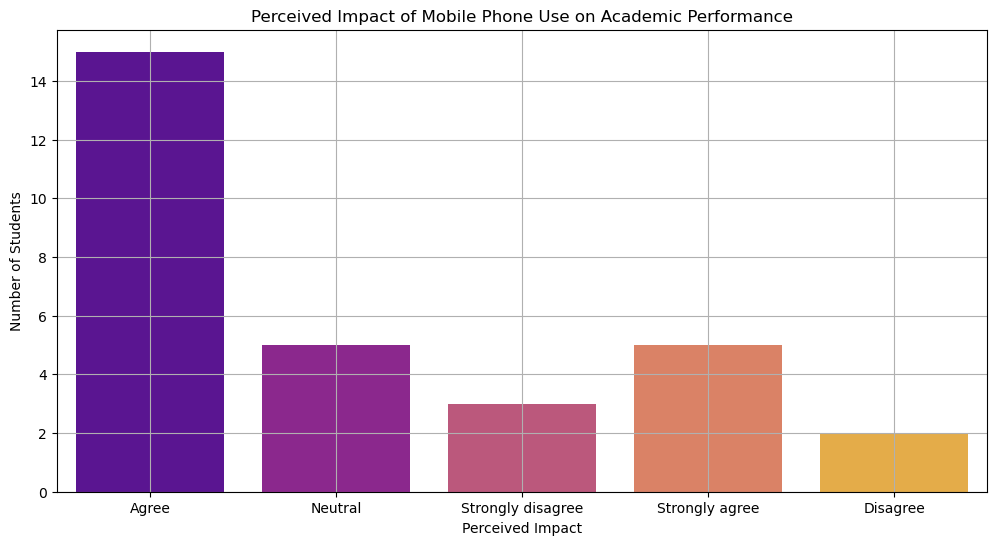

In [202]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Performance impact', data=data, palette='plasma')
plt.title('Perceived Impact of Mobile Phone Use on Academic Performance')
plt.xlabel('Perceived Impact')
plt.ylabel('Number of Students')
plt.grid(True)
plt.savefig('performance_impact_bar_chart.png')
plt.show()

<b>Health Precautions Taken:</b><br>
<b>Observation:</b>The pie chart shows the different health precautions students take to mitigate the risks associated with mobile phone use, such as using blue light filters and limiting screen time.<br>
<b>Visualization:</b>
The pie chart indicates the extent to which students are aware of and take precautions against health risks associated with mobile phone use, with some taking proactive measures and others not.

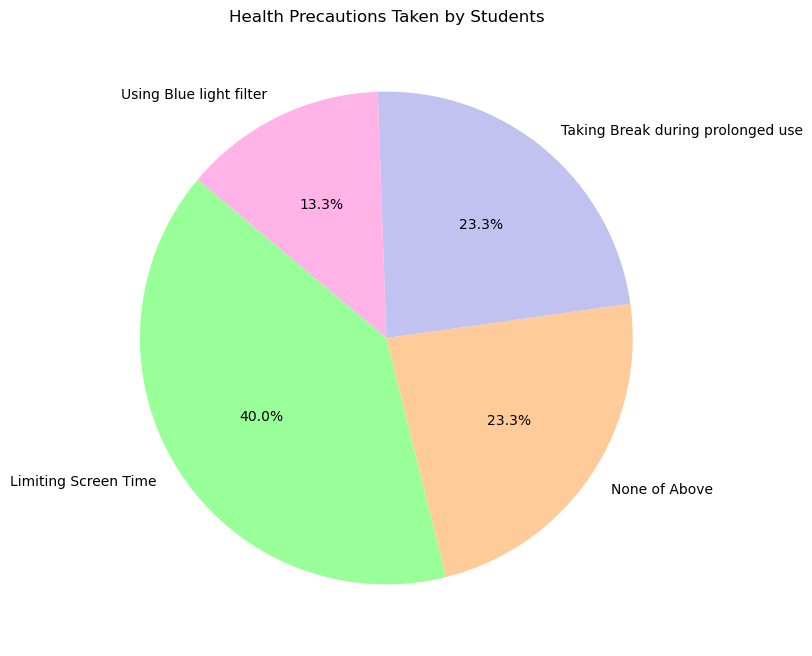

In [184]:
precautions_counts = data['Health precautions'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(precautions_counts, labels=precautions_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Health Precautions Taken by Students')
plt.savefig('health_precautions_pie_chart.png')
plt.show()

<b>Health Symptoms and Their Relationship with Academic Performance:</b><br>
<b>Observation:</b>Bar chart showing the frequency of various health symptoms and their association with perceived academic performance<br>
<b>Visualization:</b>
Determine if students experiencing more frequent symptoms (e.g., sleep disturbances, anxiety) report different impacts on academic performance.

/var/folders/tr/k6p_v_xx1hx5281_0lzfgbb80000gn/T/ipykernel_79997/2323496303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Usage symptoms', data=data, palette='viridis')


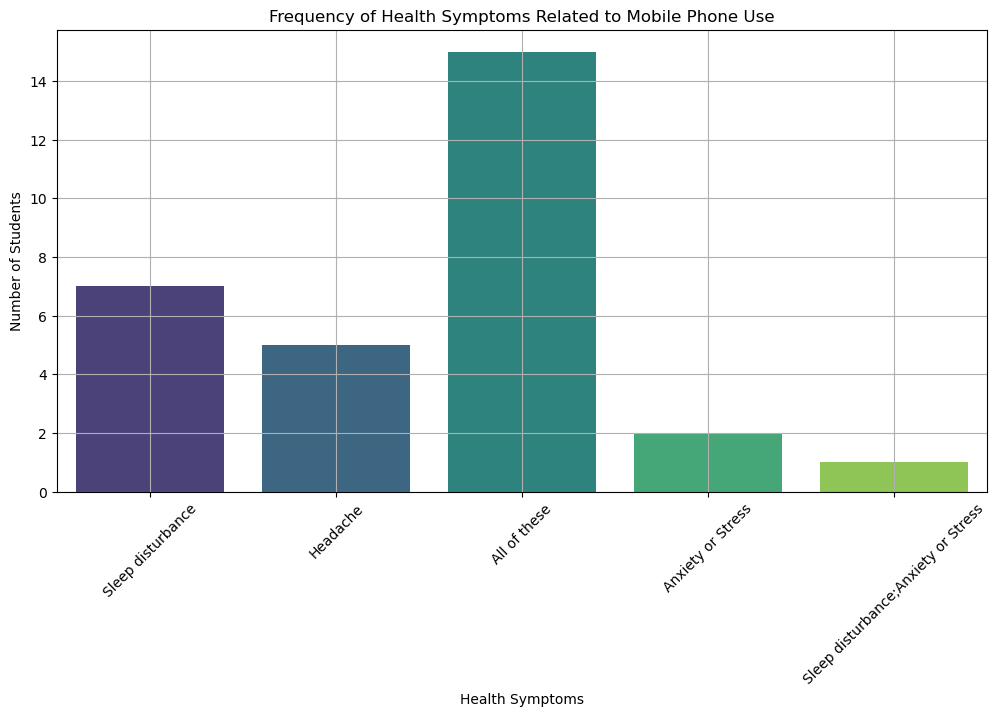

In [186]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Usage symptoms', data=data, palette='viridis')
plt.title('Frequency of Health Symptoms Related to Mobile Phone Use')
plt.xlabel('Health Symptoms')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('health_symptoms_frequency_bar_chart.png')
plt.show()

<b>Relationship Between Mobile Phone Usage Patterns and Academic Performance</b><br>
<b>Observation:</b> Identify if more frequent usage is associated with better or worse academic performance.<br>
<b>Visualization:</b>
Scatter plot or box plot to analyze how different patterns of mobile phone usage for educational purposes (e.g., Sometime, Frequently, Rarely) correlate with perceived academic performance.


/var/folders/tr/k6p_v_xx1hx5281_0lzfgbb80000gn/T/ipykernel_79997/3970244760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Usage Code', y='Performance impact', data=data, palette='coolwarm')


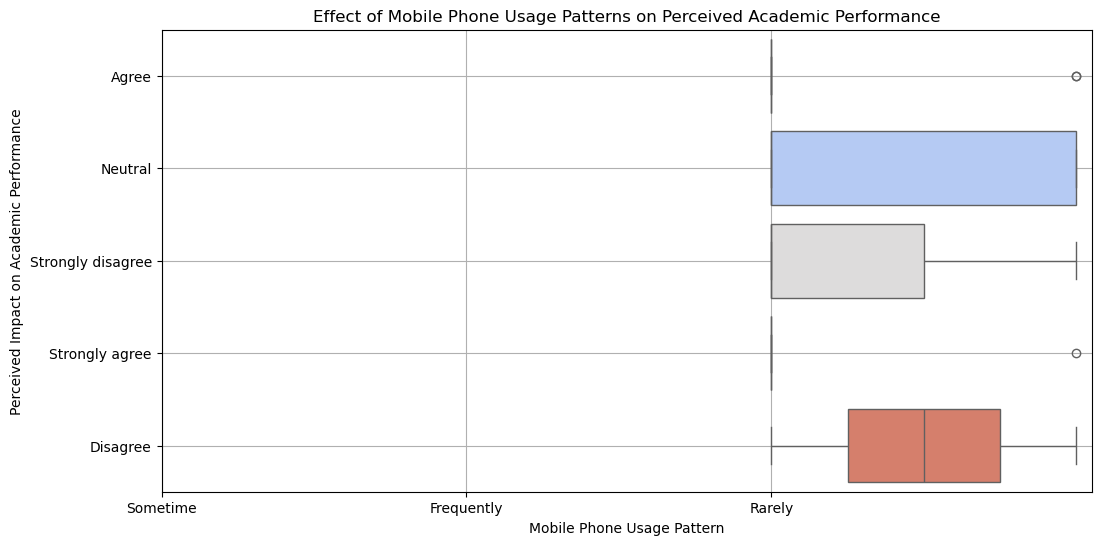

In [170]:
usage_mapping = {'Sometime': 1, 'Frequently': 2, 'Rarely': 3}
data['Usage Code'] = data['Mobile phone use for education'].map(usage_mapping)

# Scatter plot for usage patterns vs. performance impact
plt.figure(figsize=(12, 6))
sns.boxplot(x='Usage Code', y='Performance impact', data=data, palette='coolwarm')
plt.title('Effect of Mobile Phone Usage Patterns on Perceived Academic Performance')
plt.xlabel('Mobile Phone Usage Pattern')
plt.ylabel('Perceived Impact on Academic Performance')
plt.xticks([0, 1, 2], ['Sometime', 'Frequently', 'Rarely'])
plt.grid(True)
plt.savefig('usage_patterns_vs_performance_impact.png')
plt.show()